In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.utils.multiclass import unique_labels
from itertools import cycle

data = pd.read_csv("../data/iris_data.csv", decimal=",")
data = data.drop(columns = ["Petal length", "Petal width"])
uL = unique_labels(data["Species"])
grps = data.groupby("Species")

print(uL)
from sklearn.cluster import MeanShift, estimate_bandwidth

['I. setosa' 'I. versicolor' 'I. virginica']


In [282]:
#for k, grps in grps:
#    print(k)
#    x, y = grps["Sepal length"], grps["Sepal width"]
 #   ax.scatter(x,y, marker="o", linewidth=0.2)

In [208]:
nemt = data[['Sepal length', 'Sepal width']]
bandwidth = estimate_bandwidth(nemt, quantile=0.2)

In [277]:
nemt

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [305]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(nemt)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters = len(labels_unique)

print('Number of estimated clusters : {}'.format(n_clusters))
nemt2 = nemt.to_numpy()
nemt2

Number of estimated clusters : 3


array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

Text(0.5, 1.0, 'Estimated number of clusters: 3')

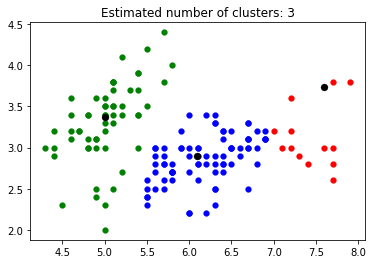

In [306]:
fig = plt.figure()
ax = fig.add_subplot(111)

colors = cycle('bgrcmy')
for k, col in zip(range(n_clusters), colors):
    my_members = (labels == k)
    cluster_center = cluster_centers[k]
    x, y = nemt2[my_members,0], nemt2[my_members,1]
    ax.scatter(x, y, c=col, linewidth=0.2)
    ax.scatter(cluster_center[0], cluster_center[1], c='k', s=50, linewidth=0.2)
    
plt.title('Estimated number of clusters: {}'.format(n_clusters))